* Funcion que nos devuelve los valores atípicos en un dataFrame

In [6]:
#Aporte
def detect_otliers(dataframe,var):
    #Calculamos los percentiles 
    Q3 = dataframe[var].quantile(0.75)
    Q1 = dataframe[var].quantile(0.25)
    #Calculamos el Rango intercuantilco
    IQR = Q3 - Q1
    #El limite superior se define así
    superior = Q3 + (1.5 * IQR)
    #El límite inferior se define así
    inferior = Q1 - (1.5 * IQR)
    #Calquier dato del dataframe que se salga de los limites es un valor atípico ya sea superior o inferior. (Nos enfocamos en su idice?)
    out_sup = dataframe[dataframe[var] > superior].index
    out_inf = dataframe[dataframe[var] < inferior].index
    outliers = []
    #Recorremos y agregamos a una lista los outliers
    for i in out_sup: #Outliers superiores
        outliers.append(i)
    for j in out_inf: #Outliers inferiores
        outliers.append(j)
        
    return outliers


In [7]:
"""
import scipy.stats
#Aporte Distribución del bmi
# Análisis de distribución variable "bmi"
sns.histplot(x= df['bmi'])
plt.title('Distribución de la variable BMI')
plt.show()

# QQ plot
scipy.stats.probplot(df['bmi'], dist='norm', plot=plt)
plt.title('Gráfico QQ para la variable BMI')
plt.show()

# Prueba shapiro para normalidad
st, p = scipy.stats.shapiro(df['bmi']) # La variable BMI sigue una distribución normal.
print(p)
"""

'\nimport scipy.stats\n#Aporte Distribución del bmi\n# Análisis de distribución variable "bmi"\nsns.histplot(x= df[\'bmi\'])\nplt.title(\'Distribución de la variable BMI\')\nplt.show()\n\n# QQ plot\nscipy.stats.probplot(df[\'bmi\'], dist=\'norm\', plot=plt)\nplt.title(\'Gráfico QQ para la variable BMI\')\nplt.show()\n\n# Prueba shapiro para normalidad\nst, p = scipy.stats.shapiro(df[\'bmi\']) # La variable BMI sigue una distribución normal.\nprint(p)\n'

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [9]:
df= pd.read_csv("insurance.csv")

In [10]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
#Los tipos de df se encuentran perfectos. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Analizando los Datos

In [12]:
df.shape

(1338, 7)

* Contamos con 1338 registros y 7 columnas

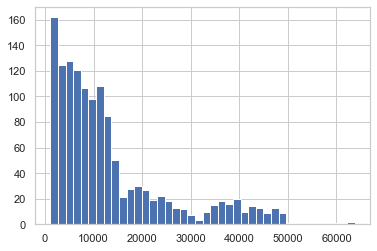

In [13]:
#Distribución de la variable predictora. de la variable dependiente
df["charges"].hist(bins=40) #Un histograma sencillo.
plt.show()

* Existen muy pocos valores después de los 50,000 
* Debemos Analizarlos

In [14]:
#Analizamos la cobranza mayor a 50 000
df[df["charges"]>50000]

,age,sex,bmi,children,smoker,region,charges
34,28,male,36.400,1,yes,southwest,51194.55914
543,54,female,47.410,0,yes,southeast,63770.42801
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209
1146,60,male,32.800,0,yes,southwest,52590.82939
1230,52,male,34.485,3,yes,northwest,60021.39897
1300,45,male,30.360,0,yes,southeast,62592.87309


* En este caso didáctico elminaremos estos valores "atípicos" pero en un contexto real lo mejor sería consultarlo.

In [15]:
condicion = df["charges"]<=50000
df = df[condicion]


In [16]:
#Comprobamos que algunos registros han sido eliminados. 
df.shape

(1331, 7)

# Análisis de Correlación de los Datos

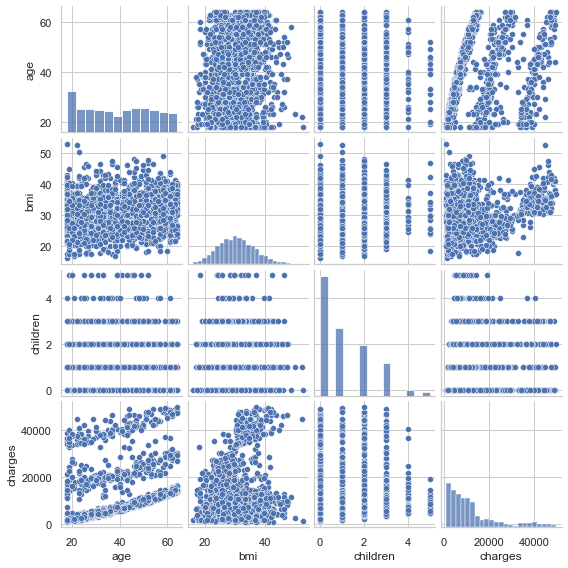

In [17]:
sns.pairplot(df,height=2.0)
plt.show()

# Diagrama de Calor

<AxesSubplot:>

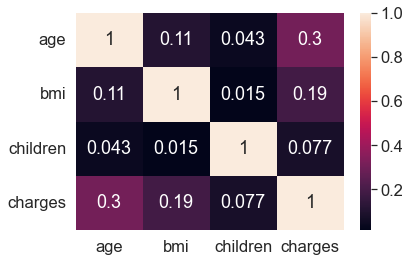

In [18]:
#Nuestra Matriz de correlación
mc = df.corr()
#Adapto el tamaño de la letra
sns.set(font_scale = 1.5)
#El mapa de calor, lo graficamos y pues dejamos a entender la barra y las anotaciones
sns.heatmap(mc,cbar=True,annot=True)

* No existe una correlación más marcada.

# Utilizando las demás variables

In [19]:
# Reconocer las variables categoricas
df.describe(include=["O"]).columns.to_list()

['sex', 'smoker', 'region']

In [20]:
#Esto sirve para transformas variables categóricas en columnas numéricas 1 y 0
#En columns cree una lina que me permite extraerlos independientemente del caso. 
#Y hago dropear first porque soy chingo. 
df = pd.get_dummies(df, columns= df.describe(include=["O"]).columns.to_list(),drop_first = True)

In [21]:
df

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


# Creando Modelos

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

* Procedemos a Estandarizar

In [23]:
X = df.drop(columns = ['charges'])
y = df[['charges']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.transform(y_test)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [24]:
model.score(X_train,y_train)

0.7651936322080035

# Evaluación del Modelo

In [25]:
import sklearn.metrics as metrics
mse = metrics.mean_squared_error(y_test,y_pred)
r2 = metrics.r2_score(y_test,y_pred)

* Un indice MSE es realmente bajo en un modelo adecuado, aunque se debe tener cuidado cuando se standariza

In [26]:
#Este es el Indice MSE
mse

0.2735122375341375

* Un r2 cercano al 75 es un modelo competente
* Un modelo excelente sería a partir del 80%

In [27]:
#Este es el Indice Es El R2
r2

0.7108109467566301

# Mejoramiento del Modelo

In [28]:
df_second = df.copy()
df_second["age2"] = df_second.age**2
df_second